In [ ]:
. Mini Deployment Project (Choose One) 
• Option A: House Price Prediction Web App 
Deploy trained regression model using Streamlit 
• Option B: Loan Approval Prediction System 
Predict loan approval status based on user inputs

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/IBM/loan-default-prediction/master/data/loan_train.csv"
df = pd.read_csv(url)
df.head()

HTTPError: HTTP Error 404: Not Found

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv"
df = pd.read_csv(url)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [6]:
import numpy as np

data = df.copy()

# Drop Loan_ID (identifier)
if "Loan_ID" in data.columns:
    data = data.drop(columns=["Loan_ID"])

# Fill missing values
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

# Map target Y/N -> 1/0
data["Loan_Status"] = data["Loan_Status"].map({"Y": 1, "N": 0})

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
X = data.drop(columns=["Loan_Status"])
y = data["Loan_Status"]

X.head(), y.head()

(  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
 0   Male      No          0      Graduate            No             5849   
 1   Male     Yes          1      Graduate            No             4583   
 2   Male     Yes          0      Graduate           Yes             3000   
 3   Male     Yes          0  Not Graduate            No             2583   
 4   Male      No          0      Graduate            No             6000   
 
    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
 0                0.0       128.0             360.0             1.0   
 1             1508.0       128.0             360.0             1.0   
 2                0.0        66.0             360.0             1.0   
 3             2358.0       120.0             360.0             1.0   
 4                0.0       141.0             360.0             1.0   
 
   Property_Area  
 0         Urban  
 1         Rural  
 2         Urban  
 3         Urban  
 4         Ur

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cat_cols = [c for c in X.columns if X[c].dtype == "object"]
num_cols = [c for c in X.columns if X[c].dtype != "object"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", SimpleImputer(strategy="median"))]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

trained = {}
for name, clf in models.items():
    pipe = Pipeline([("prep", preprocess), ("model", clf)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    trained[name] = {"pipe": pipe, "acc": acc, "cm": cm}
    print(f"{name} Accuracy: {acc:.4f}")

C:\Users\Lenovo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8618
Random Forest Accuracy: 0.8211


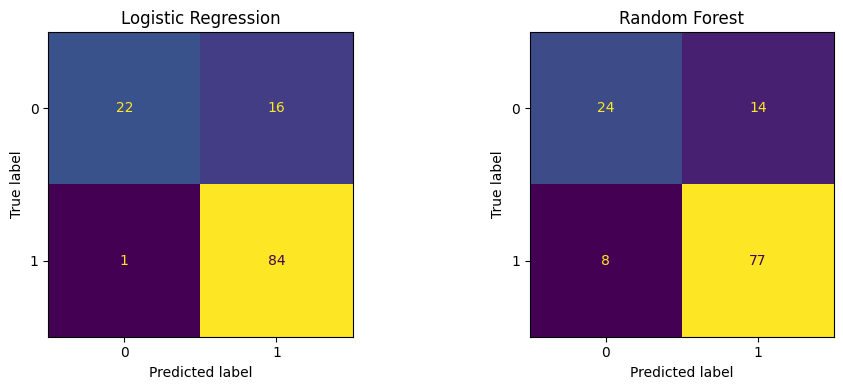

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
for ax, (name, obj) in zip(axes, trained.items()):
    ConfusionMatrixDisplay(obj["cm"]).plot(ax=ax, colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()

In [10]:
best_name = max(trained, key=lambda k: trained[k]["acc"])
best_model = trained[best_name]["pipe"]
print("Best model:", best_name, "Accuracy:", trained[best_name]["acc"])

def predict_loan(input_dict: dict):
    inp = pd.DataFrame([input_dict])
    pred = best_model.predict(inp)[0]
    prob = None
    if hasattr(best_model.named_steps["model"], "predict_proba"):
        prob = best_model.predict_proba(inp)[0][1]  # prob of Approved(1)
    label = "APPROVED" if pred == 1 else "REJECTED"
    return label, prob

Best model: Logistic Regression Accuracy: 0.8617886178861789


In [11]:
demo = {}
for col in X.columns:
    if col in num_cols:
        demo[col] = float(X[col].median())
    else:
        demo[col] = str(X[col].mode()[0])

label, prob = predict_loan(demo)
print("Input:", demo)
print("Prediction:", label)
print("Approval Probability:", None if prob is None else round(prob, 3))

Input: {'Gender': 'Male', 'Married': 'Yes', 'Dependents': '0', 'Education': 'Graduate', 'Self_Employed': 'No', 'ApplicantIncome': 3812.5, 'CoapplicantIncome': 1188.5, 'LoanAmount': 128.0, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0, 'Property_Area': 'Semiurban'}
Prediction: APPROVED
Approval Probability: 0.877
